# RL Algorithms Tutorial

In [2]:
import sys
import os
import time
# Add the path to the parent module
sys.path.append(os.path.abspath('../..'))

In [3]:
import gymnasium as gym

import torch
import torch.nn as nn
import torch.optim as optim

from IPython.display import HTML, Markdown

import deeppy as dp
from deeppy import LearnFrame
from deeppy.models.rl import *
from deeppy.data import EnvData

from deeppy.tutorials.assets.tutorial_utils import RLIntroduction
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")



In [3]:
Intro = RLIntroduction(tut=2)
clss, env_name, buf_size, model_params, file_name, env = Intro()


Selected algorithm SAC
Checkpoint environment : LunarLander-v3
Checkpoint Buffer size  100000


## Data

In [4]:
data = EnvData(env = env, buffer_size = int(buf_size), batch_size = 128, start_size = 128)

# Create With Default Parameters

## Model


In [5]:
model = clss(**model_params)
lf = LearnFrame(model,data)

#### Or Load Checkpoint

In [8]:
lf = LearnFrame(model = clss, data = data)
lf.load(file_name = file_name, load_data = False)

KeyError: 'metric'

# Custom

## Data

In [4]:
EnvData.print_args()
#Create gym environment
env = gym.make("InvertedPendulum-v5", render_mode="rgb_array")

#Get observation and action dimentions
obs, act = env.observation_space.shape[-1], env.action_space.shape
#Create our data object
data = EnvData(env = env, buffer_size = 10000, batch_size = 128, start_size = 128)

print(f"obs shape : {obs} | act shape : {act[-1]}")

EnvData_params = {
    "env",
    "buffer_size":20000,
    "batch_size":128,
    "start_size":128,
}
obs shape : 4 | act shape : 1


## Model

In [8]:
clss.print_args()

        arch_params = {
            "layers":[],
            "blocks":[],
            "block_args":[],
            "out_act":<class 'torch.nn.modules.activation.ReLU'>,
            "out_params":{},
            "weight_init":None,
        }
            Scheduler_params = {
                "scheduler",
                "auto_step":True,
                "**kwargs",
            }
        Optimizer_params = {
            "optimizer":<class 'torch.optim.adamw.AdamW'>,
            "optimizer_args":{},
            "clipper":None,
            "clipper_params":{},
            "scheduler_params":None,
        }
    Network_params = {
        "arch_params",
        "decoder_params":None,
        "task":'reg',
        "optimizer_params":{},
    }
            arch_params = {
                "layers":[],
                "blocks":[],
                "block_args":[],
                "out_act":<class 'torch.nn.modules.activation.ReLU'>,
                "out_params":{},
                "weight_init":None,

In [ ]:


        arch_params = {
            "layers":[],
            "blocks":[],
            "block_args":[],
            "out_act":<class 'torch.nn.modules.activation.ReLU'>,
            "out_params":{},
            "weight_init":None,
        }
            Scheduler_params = {
                "scheduler",
                "auto_step":True,
                "**kwargs",
            }
        Optimizer_params = {
            "optimizer":<class 'torch.optim.adamw.AdamW'>,
            "optimizer_args":{},
            "clipper":None,
            "clipper_params":{},
            "scheduler_params":None,
        }
    Network_params = {
        "arch_params",
        "decoder_params":None,
        "task":'reg',
        "optimizer_params":{},
    }
            arch_params = {
                "layers":[],
                "blocks":[],
                "block_args":[],
                "out_act":<class 'torch.nn.modules.activation.ReLU'>,
                "out_params":{},
                "weight_init":None,
            }
                Scheduler_params = {
                    "scheduler",
                    "auto_step":True,
                    "**kwargs",
                }
            Optimizer_params = {
                "optimizer":<class 'torch.optim.adamw.AdamW'>,
                "optimizer_args":{},
                "clipper":None,
                "clipper_params":{},
                "scheduler_params":None,
            }
        Network_params = {
            "arch_params",
            "decoder_params":None,
            "task":'reg',
            "optimizer_params":{},
        }
        Epsilon_params = {
            "eps":0.9,
            "eps_end":0.05,
            "eps_decay":1000,
            "random_generator":None,
        }
    DDQN_params = {
        "network_params",
        "gamma":0.99,
        "tau":0.005,
        "eps_params":{'eps': None},
    }
SAC_params = {
    "ddqn_params",
    "pnet_params",
    "alpha_lr":lr,
    "gamma":0.99,
    "target_entropy":-1.0,
    "device":device,
    "criterion":nn.MSELoss(),
    "mode":'continious',
    "continuous_action":<built-in method tanh of type object at 0x727da019df60>,
}


In [ ]:
model = clss(**model_params)
lf = LearnFrame(model,data)

# Train

<Figure size 640x480 with 0 Axes>

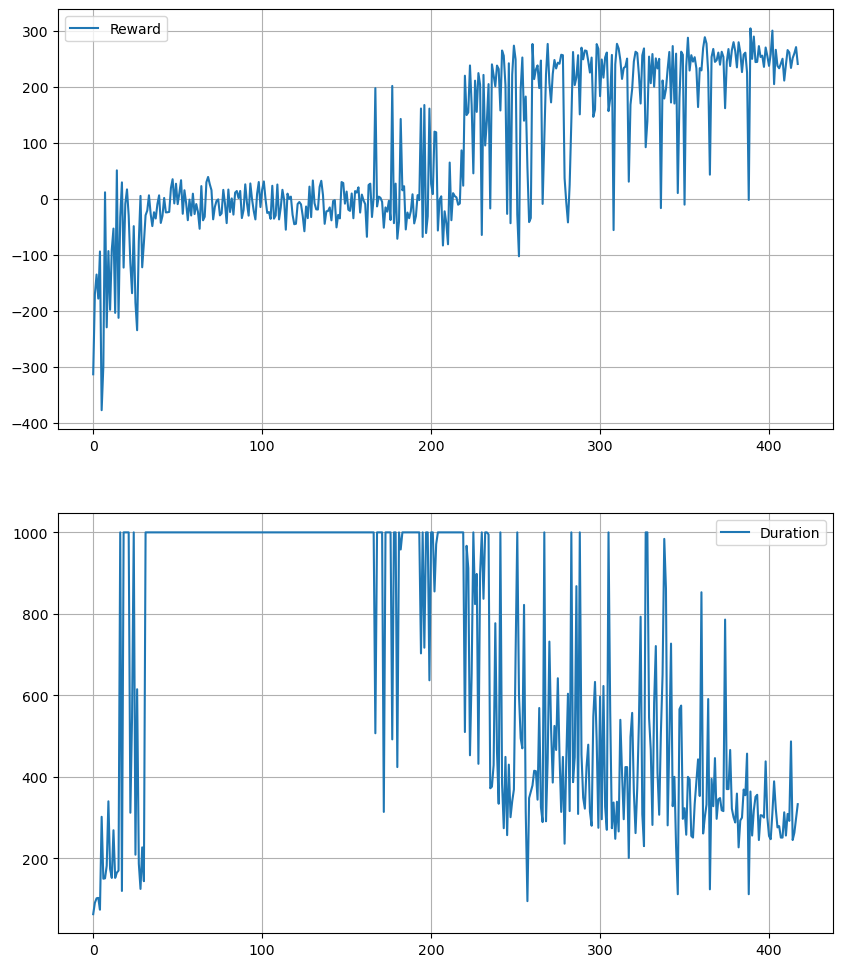

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [16]:
epoch = 21
lf.reset()

for i in range(epoch):
    done = False
    while not done:
        done = lf.collect()
        r=lf.optimize()
    if r is not None:
        pass
        #lf.model.scheduler_step()
    if i % 10 == 0 and r is not None :
        lf.plot(show_result=False)

        
lf.plot(show_result=True)

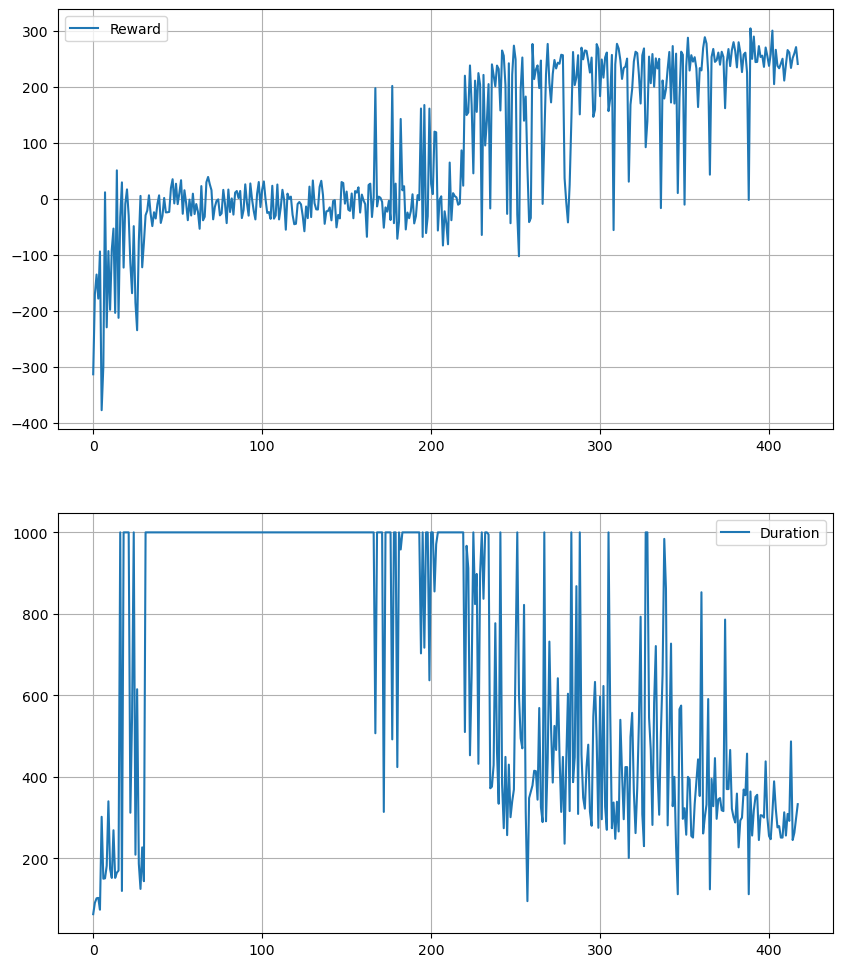

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [17]:
lf.plot(show_result=True, save = "lunar.png")

In [20]:
lf.save(file_name = file_name)

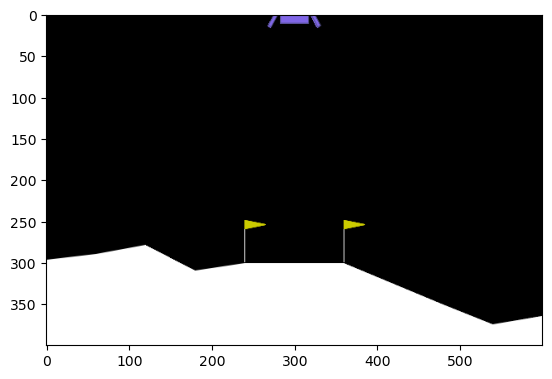

In [18]:
lf.reset()
anim = lf.get_anim(interval = 1000/30)
HTML(anim.to_jshtml())

In [19]:
anim.save("lunarlander.gif", writer='pillow', fps=30)